In [1]:
#Import Required libraries
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
train.head()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,107339,32,F,15,0,0,0,0,0,0,Yes
1,157372,58,F,68,0,0,0,0,0,1,No
2,84080,47,F,41,0,0,0,0,0,1,No
3,76807,52,F,3,0,0,0,1,0,0,Yes
4,18730,56,M,1,0,0,1,0,0,0,Yes


In [3]:
train.describe(include='all')

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
count,144169.000000,144169.000000,144169,144169.000000,144169.000000,144169.000000,144169.000000,144169.000000,144169.000000,144169.000000,144169
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,96375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100657
mean,90182.699693,37.794117,NaN,54.662001,0.078325,0.025123,0.216413,0.052619,0.000333,0.573653,NaN
std,52005.229692,22.844295,NaN,35.723263,0.268683,0.156500,0.411800,0.223272,0.018244,0.499696,NaN
min,1.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,45212.000000,19.000000,NaN,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,90199.000000,38.000000,NaN,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
75%,135280.000000,56.000000,NaN,86.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144169 entries, 0 to 144168
Data columns (total 11 columns):
patient_id             144169 non-null int64
Age                    144169 non-null int64
Gender                 144169 non-null object
Prescription_period    144169 non-null int64
Diabetes               144169 non-null int64
Alcoholism             144169 non-null int64
HyperTension           144169 non-null int64
Smokes                 144169 non-null int64
Tuberculosis           144169 non-null int64
Sms_Reminder           144169 non-null int64
Adherence              144169 non-null object
dtypes: int64(9), object(2)
memory usage: 12.1+ MB


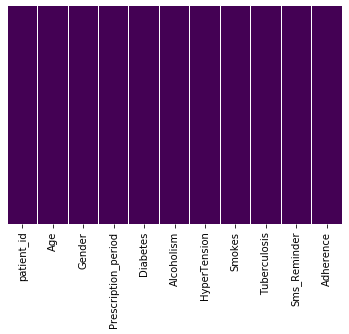

In [6]:
#Missing Data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# No null value

# Data Understanding

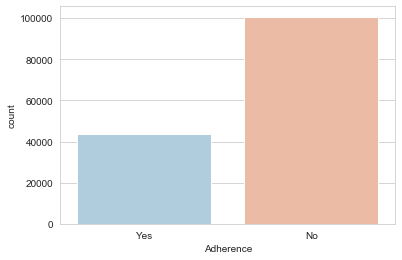

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Adherence',data=train,palette='RdBu_r')

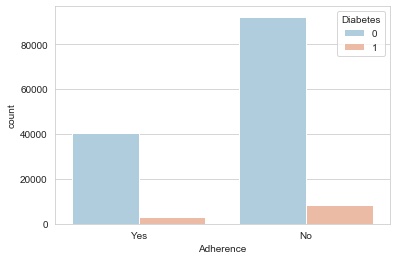

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Adherence',hue='Diabetes',data=train,palette='RdBu_r')

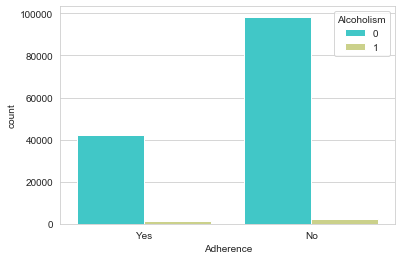

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Adherence',hue='Alcoholism',data=train,palette='rainbow')

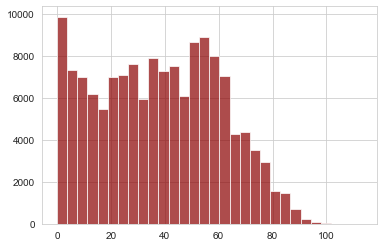

In [11]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

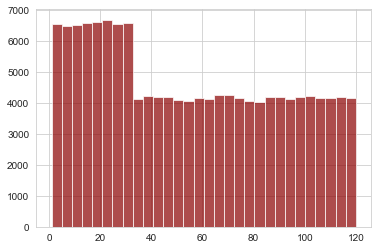

In [12]:
train['Prescription_period'].hist(bins=30,color='darkred',alpha=0.7)

# Data Cleaning
We want to fill in missing data instead of just dropping the missing data rows. One way to do this is by filling in the mean of that column. Note: Here we don't have missing value. So, this step is not needed here. But for general purpose we are doing it.

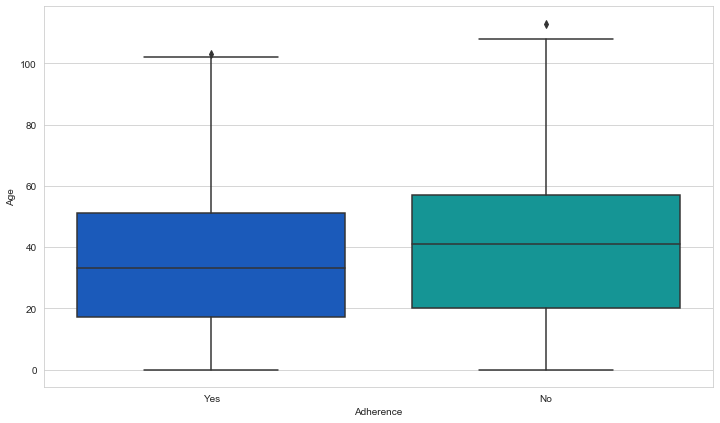

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Adherence',y='Age',data=train,palette='winter')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144169 entries, 0 to 144168
Data columns (total 11 columns):
patient_id             144169 non-null int64
Age                    144169 non-null int64
Gender                 144169 non-null object
Prescription_period    144169 non-null int64
Diabetes               144169 non-null int64
Alcoholism             144169 non-null int64
HyperTension           144169 non-null int64
Smokes                 144169 non-null int64
Tuberculosis           144169 non-null int64
Sms_Reminder           144169 non-null int64
Adherence              144169 non-null object
dtypes: int64(9), object(2)
memory usage: 12.1+ MB


In [15]:
dummy_var = {'Gender':     {'F': 0, 'M': 1},
             'Adherence': {'No': 0, 'Yes':1 }}

In [16]:
#Converting data type object to int. So now all the columns are of int datatype.
train_int = train.replace(dummy_var)
train_int.head()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,107339,32,0,15,0,0,0,0,0,0,1
1,157372,58,0,68,0,0,0,0,0,1,0
2,84080,47,0,41,0,0,0,0,0,1,0
3,76807,52,0,3,0,0,0,1,0,0,1
4,18730,56,1,1,0,0,1,0,0,0,1


In [17]:
train_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144169 entries, 0 to 144168
Data columns (total 11 columns):
patient_id             144169 non-null int64
Age                    144169 non-null int64
Gender                 144169 non-null int64
Prescription_period    144169 non-null int64
Diabetes               144169 non-null int64
Alcoholism             144169 non-null int64
HyperTension           144169 non-null int64
Smokes                 144169 non-null int64
Tuberculosis           144169 non-null int64
Sms_Reminder           144169 non-null int64
Adherence              144169 non-null int64
dtypes: int64(11)
memory usage: 12.1 MB


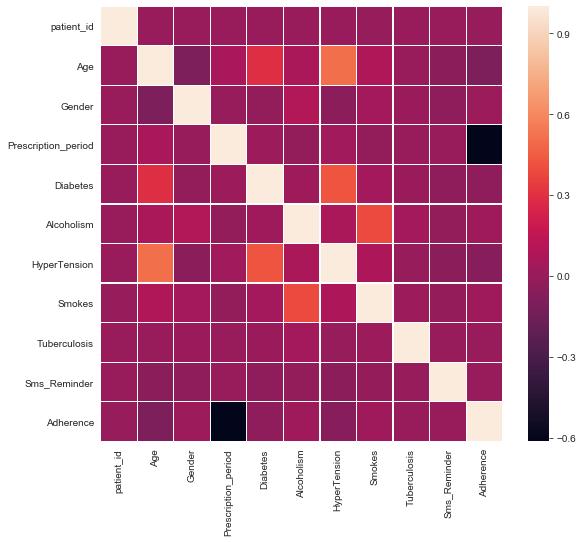

In [18]:
cor = train_int.corr(method ='pearson') 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(cor, ax = ax, linewidths = 0.1) 

In [19]:
#From corr graph and valus(as below) it is clear that Adherence is highly corr with Prescription_period
# Also Diabetes' and 'HyperTension' are highly correlated with 'Age' so we remove these columns
# Also, same for 'Alcoholism', it is highly correlated with 'Smokes' column.
cor

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
patient_id,1.000000,-0.000724,0.000263,0.001444,-0.001548,0.001192,0.001516,-0.003372,0.002352,0.003765,-0.001978
Age,-0.000724,1.000000,-0.102198,0.060301,0.294199,0.071737,0.509821,0.091809,-0.000318,-0.052889,-0.101330
Gender,0.000263,-0.102198,1.000000,-0.004993,-0.019219,0.095209,-0.046845,0.042509,0.007339,-0.028165,0.010951
Prescription_period,0.001444,0.060301,-0.004993,1.000000,0.016110,-0.014923,0.034948,-0.016508,-0.000775,-0.000245,-0.613014
Diabetes,-0.001548,0.294199,-0.019219,0.016110,1.000000,0.022155,0.422804,0.043456,0.004585,-0.031344,-0.030485
Alcoholism,0.001192,0.071737,0.095209,-0.014923,0.022155,1.000000,0.069222,0.393529,0.040800,-0.019493,0.025763
HyperTension,0.001516,0.509821,-0.046845,0.034948,0.422804,0.069222,1.000000,0.078708,-0.002205,-0.045067,-0.060344
Smokes,-0.003372,0.091809,0.042509,-0.016508,0.043456,0.393529,0.078708,1.000000,0.016134,-0.012604,0.026018
Tuberculosis,0.002352,-0.000318,0.007339,-0.000775,0.004585,0.040800,-0.002205,0.016134,1.000000,-0.003451,0.002081
Sms_Reminder,0.003765,-0.052889,-0.028165,-0.000245,-0.031344,-0.019493,-0.045067,-0.012604,-0.003451,1.000000,-0.001506


In [20]:
Train_int = train_int.drop(['patient_id','Diabetes','Alcoholism','HyperTension'], axis=1)
Train_int.head()

,Age,Gender,Prescription_period,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,32,0,15,0,0,0,1
1,58,0,68,0,0,1,0
2,47,0,41,0,0,1,0
3,52,0,3,1,0,0,1
4,56,1,1,0,0,0,1


In [21]:
Train_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144169 entries, 0 to 144168
Data columns (total 7 columns):
Age                    144169 non-null int64
Gender                 144169 non-null int64
Prescription_period    144169 non-null int64
Smokes                 144169 non-null int64
Tuberculosis           144169 non-null int64
Sms_Reminder           144169 non-null int64
Adherence              144169 non-null int64
dtypes: int64(7)
memory usage: 7.7 MB


In [23]:
# Split data into train and dev set
y = Train_int['Adherence']
x_train, x_dev = train_test_split(Train_int,test_size=0.2,stratify=y, random_state=42)

In [24]:
x_train.reset_index(drop=True,inplace=True)
x_dev.reset_index(drop=True,inplace=True)

In [25]:
X_train=x_train.drop('Adherence',axis=1)
X_dev=x_dev.drop('Adherence',axis=1)

In [29]:
y_train=x_train['Adherence']
y_dev=x_dev['Adherence']

pandas.core.series.Series

# Model

In [30]:
scale_pos_weight = np.sum(y_train==0)/np.sum(y_train==1)
scale_pos_weight

2.3132720482619935

In [32]:
parameters = {'nthread':[-1], 
              'scale_pos_weight':[scale_pos_weight],
              'objective':['binary:logistic'],
              'learning_rate': [0.005, 0.01, 0.015],
              'max_depth': [4,5,6],
              'n_estimators': [500,1000,1500],
              'seed': [133]}

In [33]:
xgb_model = xgb.XGBClassifier()

In [34]:
clf = GridSearchCV(xgb_model, parameters, n_jobs=-1, 
                   cv = StratifiedKFold(shuffle=True,n_splits=3), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

In [35]:
clf.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_w...pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'nthread': [-1], 'scale_pos_weight': [2.3132720482619935], 'objective': ['binary:logistic'], 'learning_rate': [0.01], 'max_depth': [4], 'n_estimators': [500], 'seed': [133]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [36]:
model = clf.best_estimator_
model

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.01, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=500, n_jobs=-1, nthread=-1, num_parallel_tree=1,
       objective='binary:logistic', random_state=133, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=2.3132720482619935, seed=133,
       subsample=1, tree_method=None, validate_parameters=False,
       verbosity=None)

# Evalution

In [54]:
ypred = model.predict_proba(X_dev)
for i in range(10):
    THRESHOLD = 0.6 + i/100
    y_pred = np.where(ypred[:,1] > THRESHOLD, 1, 0)
    print('Accuracy Score : {one} for tresold {two}'.format(one = accuracy_score(y_dev,y_pred), two = THRESHOLD))
#At thresold = 0.68 we got max accuracy

Accuracy Score : 0.8944301865852813 for tresold 0.6
Accuracy Score : 0.894776999375737 for tresold 0.61
Accuracy Score : 0.8948463619338282 for tresold 0.62
Accuracy Score : 0.8948463619338282 for tresold 0.63
Accuracy Score : 0.8948116806547826 for tresold 0.64
Accuracy Score : 0.8947076368176459 for tresold 0.65
Accuracy Score : 0.8951584934452382 for tresold 0.6599999999999999
Accuracy Score : 0.8951584934452382 for tresold 0.6699999999999999
Accuracy Score : 0.8954012623985572 for tresold 0.6799999999999999
Accuracy Score : 0.8953665811195117 for tresold 0.69


In [55]:
# Model for finding accuracy, cunfusion matrix and f1 score for given test data
def ConfusionMatrix_Accuracy(X,y):
    #Model Formatiom
    ypred = model.predict_proba(X)
    # Output Prediction
    THRESHOLD = 0.68
    y_pred = np.where(ypred[:,1] > THRESHOLD, 1, 0)
    #Confusion matrix
    result = confusion_matrix(y,y_pred) 
    print('Confusion Matrix :')
    print(result)
    print('Accuracy Score :',accuracy_score(y,y_pred))
    print('Report : ')
    print(classification_report(y,y_pred))
    
    return y_pred

In [56]:
model_final(X_dev,y_dev)

Confusion Matrix :
[[18030  2102]
 [  914  7788]]
Accuracy Score : 0.8954012623985572
Report : 
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     20132
           1       0.79      0.89      0.84      8702

   micro avg       0.90      0.90      0.90     28834
   macro avg       0.87      0.90      0.88     28834
weighted avg       0.90      0.90      0.90     28834



array([1, 0, 0, ..., 1, 1, 0])

In [57]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_dev, ypred[:,1])
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
auc = metrics.auc(fpr,tpr)
print(auc)

0.9126353403779597


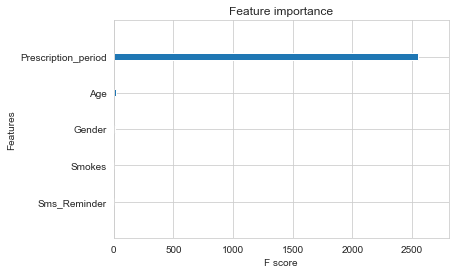

In [58]:
from xgboost import plot_importance
plot_importance(model,importance_type = "gain",max_num_features=5,show_values="False")

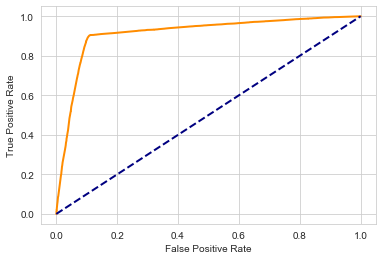

In [59]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

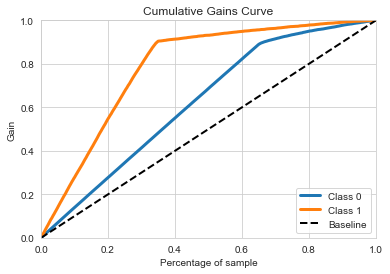

In [62]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_dev, ypred)
plt.show()

# Evalutate on test data set:

In [63]:
test = pd.read_csv('test.csv')
test.head()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,179127,16,F,67,0,0,0,0,0,1,No
1,110505,11,M,71,0,0,0,0,0,1,No
2,105240,20,F,82,0,0,0,0,0,1,No
3,143991,61,F,64,1,0,1,0,0,1,No
4,127304,14,F,58,0,0,0,0,0,1,No


In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36043 entries, 0 to 36042
Data columns (total 11 columns):
patient_id             36043 non-null int64
Age                    36043 non-null int64
Gender                 36043 non-null object
Prescription_period    36043 non-null int64
Diabetes               36043 non-null int64
Alcoholism             36043 non-null int64
HyperTension           36043 non-null int64
Smokes                 36043 non-null int64
Tuberculosis           36043 non-null int64
Sms_Reminder           36043 non-null int64
Adherence              36043 non-null object
dtypes: int64(9), object(2)
memory usage: 3.0+ MB


In [65]:
dummy_var_test = {'Gender':     {'F': 0, 'M': 1},
             'Adherence': {'No': 0, 'Yes':1 }}

In [66]:
#Converting data type object to int. So now all the columns are of int datatype.
test_x = test.replace(dummy_var_test)
test_y = test_x['Adherence']
test_x.drop(['patient_id','Diabetes','Alcoholism','HyperTension', 'Adherence'], axis=1, inplace=True)
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36043 entries, 0 to 36042
Data columns (total 6 columns):
Age                    36043 non-null int64
Gender                 36043 non-null int64
Prescription_period    36043 non-null int64
Smokes                 36043 non-null int64
Tuberculosis           36043 non-null int64
Sms_Reminder           36043 non-null int64
dtypes: int64(6)
memory usage: 1.7 MB


In [67]:
ConfusionMatrix_Accuracy(test_x, test_y)

Confusion Matrix :
[[22468  2697]
 [ 1143  9735]]
Accuracy Score : 0.8934605887412258
Report : 
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     25165
           1       0.78      0.89      0.84     10878

   micro avg       0.89      0.89      0.89     36043
   macro avg       0.87      0.89      0.88     36043
weighted avg       0.90      0.89      0.90     36043



array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
#Thank you.